In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Found 806 images belonging to 9 classes.
Evaluating vgg16...
vgg16 - Test Loss: 0.05714939534664154, Test Accuracy: 0.9826302528381348


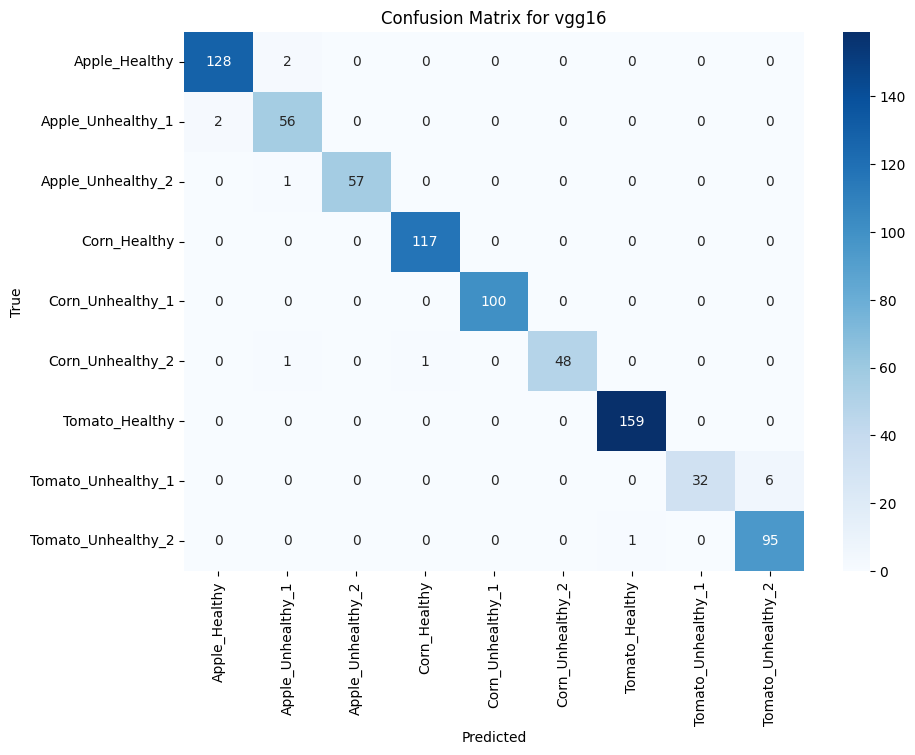

                    precision    recall  f1-score   support

     Apple_Healthy       0.98      0.98      0.98       130
 Apple_Unhealthy_1       0.93      0.97      0.95        58
 Apple_Unhealthy_2       1.00      0.98      0.99        58
      Corn_Healthy       0.99      1.00      1.00       117
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       1.00      0.96      0.98        50
    Tomato_Healthy       0.99      1.00      1.00       159
Tomato_Unhealthy_1       1.00      0.84      0.91        38
Tomato_Unhealthy_2       0.94      0.99      0.96        96

          accuracy                           0.98       806
         macro avg       0.98      0.97      0.98       806
      weighted avg       0.98      0.98      0.98       806

Evaluating mobilenet...
mobilenet - Test Loss: 0.05271206051111221, Test Accuracy: 0.9838709831237793


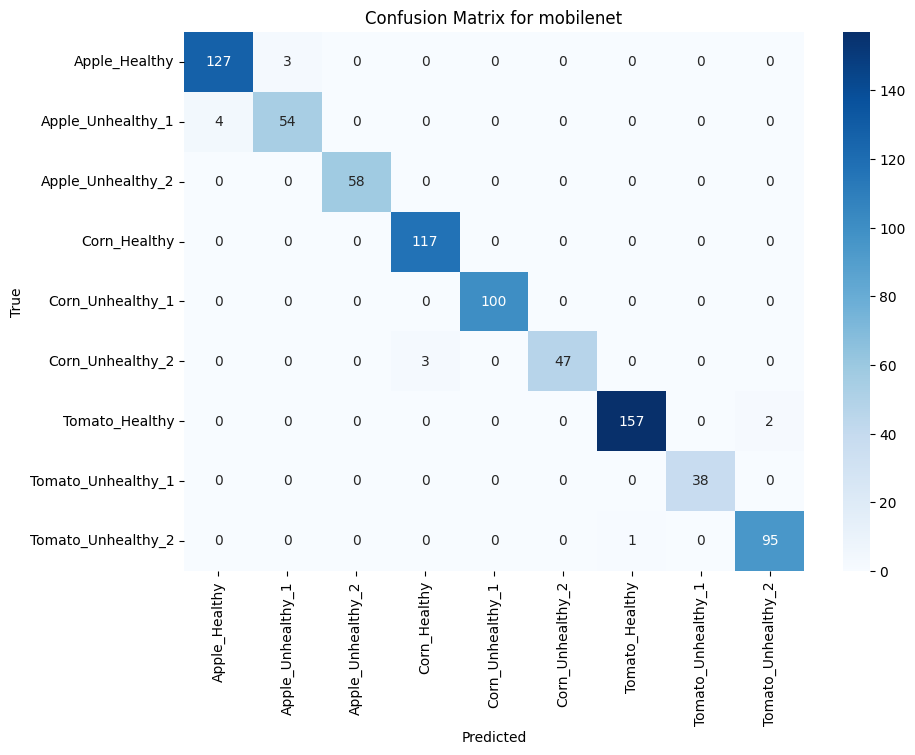

                    precision    recall  f1-score   support

     Apple_Healthy       0.97      0.98      0.97       130
 Apple_Unhealthy_1       0.95      0.93      0.94        58
 Apple_Unhealthy_2       1.00      1.00      1.00        58
      Corn_Healthy       0.97      1.00      0.99       117
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       1.00      0.94      0.97        50
    Tomato_Healthy       0.99      0.99      0.99       159
Tomato_Unhealthy_1       1.00      1.00      1.00        38
Tomato_Unhealthy_2       0.98      0.99      0.98        96

          accuracy                           0.98       806
         macro avg       0.98      0.98      0.98       806
      weighted avg       0.98      0.98      0.98       806

Evaluating densenet121...
densenet121 - Test Loss: 0.05200368911027908, Test Accuracy: 0.9863523840904236


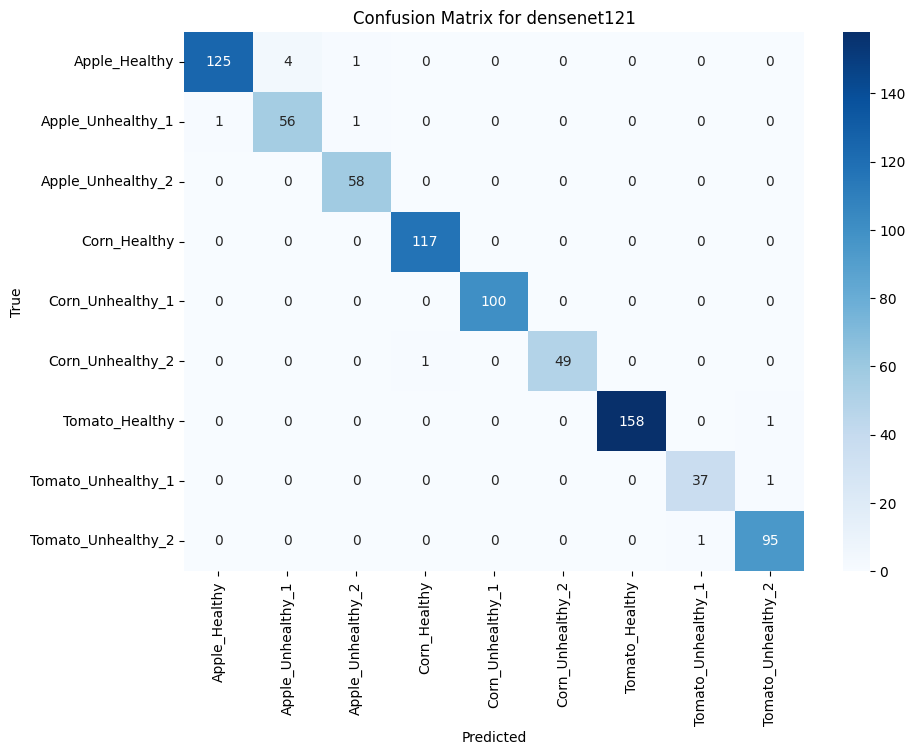

                    precision    recall  f1-score   support

     Apple_Healthy       0.99      0.96      0.98       130
 Apple_Unhealthy_1       0.93      0.97      0.95        58
 Apple_Unhealthy_2       0.97      1.00      0.98        58
      Corn_Healthy       0.99      1.00      1.00       117
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       1.00      0.98      0.99        50
    Tomato_Healthy       1.00      0.99      1.00       159
Tomato_Unhealthy_1       0.97      0.97      0.97        38
Tomato_Unhealthy_2       0.98      0.99      0.98        96

          accuracy                           0.99       806
         macro avg       0.98      0.98      0.98       806
      weighted avg       0.99      0.99      0.99       806

Evaluating inception_v3...
inception_v3 - Test Loss: 0.01300392672419548, Test Accuracy: 0.9950371980667114


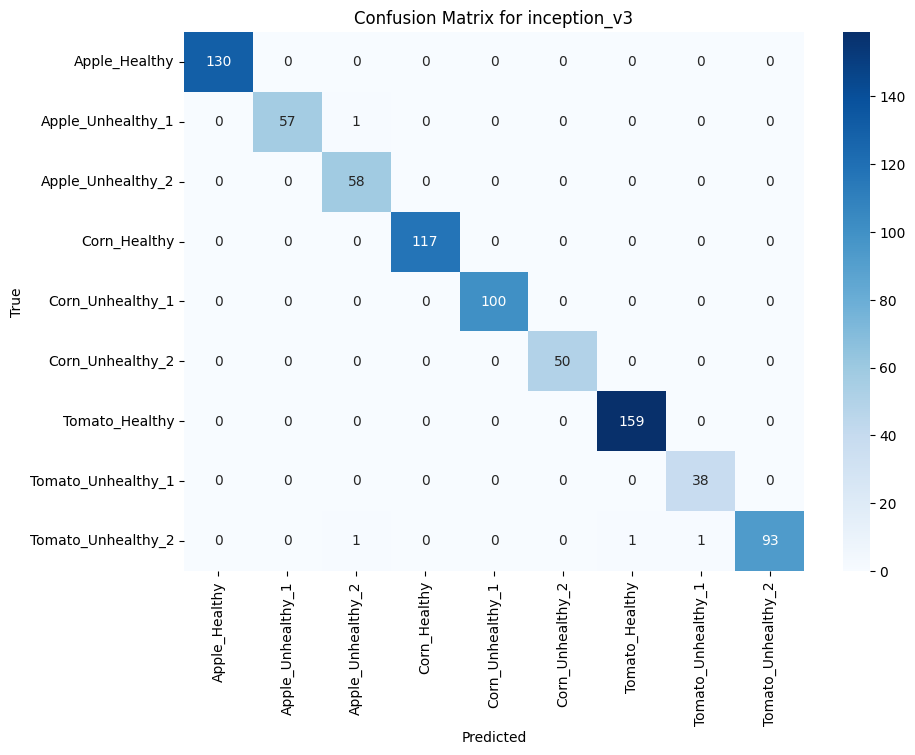

                    precision    recall  f1-score   support

     Apple_Healthy       1.00      1.00      1.00       130
 Apple_Unhealthy_1       1.00      0.98      0.99        58
 Apple_Unhealthy_2       0.97      1.00      0.98        58
      Corn_Healthy       1.00      1.00      1.00       117
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       1.00      1.00      1.00        50
    Tomato_Healthy       0.99      1.00      1.00       159
Tomato_Unhealthy_1       0.97      1.00      0.99        38
Tomato_Unhealthy_2       1.00      0.97      0.98        96

          accuracy                           1.00       806
         macro avg       0.99      0.99      0.99       806
      weighted avg       1.00      1.00      1.00       806



In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


test_data_path = '/content/gdrive/MyDrive/GWAR_Project/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_batches = test_datagen.flow_from_directory(directory=test_data_path, target_size=(224, 224), classes=['Apple_Healthy', 'Apple_Unhealthy_1', 'Apple_Unhealthy_2', 'Corn_Healthy', 'Corn_Unhealthy_1', 'Corn_Unhealthy_2', 'Tomato_Healthy', 'Tomato_Unhealthy_1', 'Tomato_Unhealthy_2'], batch_size=32, shuffle=False)
model_paths = {
    'vgg16': '/content/gdrive/MyDrive/Gwar_models/vgg16_best_model_2.h5',
    'mobilenet': '/content/gdrive/MyDrive/Gwar_models/Mobilenet_model_2.h5',
    'densenet121': '/content/gdrive/MyDrive/Gwar_models/Densenet121_model_2.h5',
    'inception_v3': '/content/gdrive/MyDrive/Gwar_models/Inceptionv3_model.h5'
}


for model_name, model_path in model_paths.items():
    print(f"Evaluating {model_name}...")
    model = load_model(model_path)
    loss, accuracy = model.evaluate(test_batches, verbose=0)
    print(f"{model_name} - Test Loss: {loss}, Test Accuracy: {accuracy}")


    predictions = model.predict(test_batches, steps=len(test_batches), verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_batches.classes
    class_labels = list(test_batches.class_indices.keys())


    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
